In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
df=pd.read_csv("//content/drive/MyDrive/Colab Notebooks/my 1 covid india/case_time_series.csv")
df.head(10)

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
5,4 February 2020,2020-02-04,0,3,0,0,0,0
6,5 February 2020,2020-02-05,0,3,0,0,0,0
7,6 February 2020,2020-02-06,0,3,0,0,0,0
8,7 February 2020,2020-02-07,0,3,0,0,0,0
9,8 February 2020,2020-02-08,0,3,0,0,0,0


In [4]:
df.isna().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [ ]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,641.000000,6.410000e+02,641.000000,6.410000e+02,641.000000,641.000000
mean,53487.361934,1.277492e+07,52513.544462,1.204517e+07,714.321373,171033.617785
std,78433.040215,1.236749e+07,76459.271069,1.201607e+07,979.005773,158531.839437
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,12401.000000,7.690570e+05,11836.000000,4.765540e+05,142.000000,21147.000000
50%,30820.000000,9.932832e+06,32514.000000,9.455626e+06,414.000000,143540.000000
75%,55117.000000,2.694744e+07,57866.000000,2.404760e+07,835.000000,306671.000000
max,414280.000000,3.428540e+07,422391.000000,3.366118e+07,6139.000000,457880.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             641 non-null    datetime64[ns]
 1   Date_YMD         641 non-null    datetime64[ns]
 2   Daily Confirmed  641 non-null    int64         
 3   Total Confirmed  641 non-null    int64         
 4   Daily Recovered  641 non-null    int64         
 5   Total Recovered  641 non-null    int64         
 6   Daily Deceased   641 non-null    int64         
 7   Total Deceased   641 non-null    int64         
dtypes: datetime64[ns](2), int64(6)
memory usage: 40.2 KB


In [6]:
df.shape

(641, 8)

In [7]:
df['Date_YMD'].min()

'2020-01-30'

In [8]:
df['Date_YMD'].max()

'2021-10-31'

In [18]:
df['DATE']=pd.to_datetime(df['Date_YMD'])

In [19]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,DATE
0,30 January 2020,2020-01-30,1,1,0,0,0,0,2020-01-30
1,31 January 2020,2020-01-31,0,1,0,0,0,0,2020-01-31
2,1 February 2020,2020-02-01,0,1,0,0,0,0,2020-02-01
3,2 February 2020,2020-02-02,1,2,0,0,0,0,2020-02-02
4,3 February 2020,2020-02-03,1,3,0,0,0,0,2020-02-03


In [21]:
df['year_month']=df['DATE'].apply(lambda x: x.strftime('%y-%m'))
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,DATE,year_month
0,30 January 2020,2020-01-30,1,1,0,0,0,0,2020-01-30,20-01
1,31 January 2020,2020-01-31,0,1,0,0,0,0,2020-01-31,20-01
2,1 February 2020,2020-02-01,0,1,0,0,0,0,2020-02-01,20-02
3,2 February 2020,2020-02-02,1,2,0,0,0,0,2020-02-02,20-02
4,3 February 2020,2020-02-03,1,3,0,0,0,0,2020-02-03,20-02


In [22]:
final=df.groupby('year_month')['Daily Confirmed','Daily Recovered'].sum().reset_index()
final

,year_month,Daily Confirmed,Daily Recovered
0,20-01,1,0
1,20-02,2,3
2,20-03,1632,147
3,20-04,33231,8909
4,20-05,155783,82803
5,20-06,395146,255978
6,20-07,1111273,747698
7,20-08,1990885,1741832
8,20-09,2622323,2432623
9,20-10,1873041,2219433


In [23]:
import matplotlib.pyplot as plt

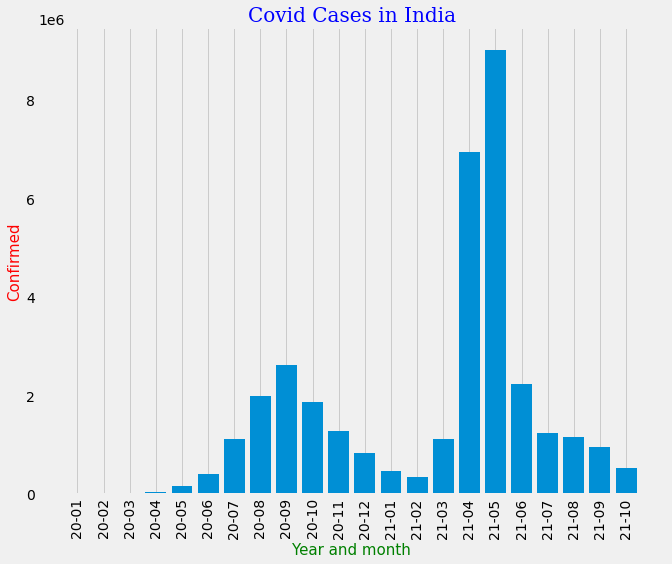

In [29]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

plt.bar(final['year_month'],final['Daily Confirmed'])

plt.xticks(final['year_month'],rotation='vertical')
#plt.yticks(final['Daily Confirmed'],rotation='horizontal')

plt.xlabel('Year and month',color='green',size=15)
plt.ylabel('Confirmed',color='red',size=15)

font1 = {'family':'serif','color':'blue','size':20}
plt.title('Covid Cases in India',fontdict = font1,loc='center')

plt.grid(axis='y',which='major')
plt.show()

In [30]:
final.to_excel('/content/drive/MyDrive/Colab Notebooks/my 1 covid india/covid_after-work.xlsx')